# Fall 2022 Data Science Intern Challenge

Please complete the following questions, and provide your thought process/work. You can
attach your work in a text file, link, etc. on the application page. Please ensure answers are
easily visible for reviewers!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

**Question 1: Given some sample data, write a program to answer the following: [click here](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0) to
access the required data set**

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one
model of shoe. We want to do some analysis of the average order value (AOV). When
we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13.
Given that we know these shops are selling sneakers, a relatively affordable item,
something seems wrong with our analysis.

In [2]:
df = pd.read_csv('ds.csv')

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
round(df[['order_amount', 'total_items']].describe(), 2)

,order_amount,total_items
count,5000.00,5000.00
mean,3145.13,8.79
std,41282.54,116.32
min,90.00,1.00
25%,163.00,1.00
50%,284.00,2.00
75%,390.00,3.00
max,704000.00,2000.00


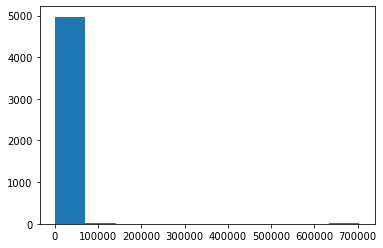

In [5]:
plt.hist(df['order_amount']);

In [6]:
Counter(df['order_amount'] > 2000)

Counter({False: 4937, True: 63})

In [7]:
index1 = df[(df['order_amount'] == 704000)].index
index1

Int64Index([  15,   60,  520, 1104, 1362, 1436, 1562, 1602, 2153, 2297, 2835,
            2969, 3332, 4056, 4646, 4868, 4882],
           dtype='int64')

In [8]:
dfx = df

In [9]:
dfx.drop(index1, inplace = True)

In [10]:
index2 = dfx[(dfx['order_amount'] > 2000)].index
index2

Int64Index([ 160,  490,  493,  511,  617,  691, 1056, 1193, 1204, 1259, 1384,
            1419, 1452, 1529, 2270, 2452, 2492, 2495, 2512, 2548, 2564, 2690,
            2773, 2818, 2821, 2906, 2922, 3085, 3101, 3151, 3167, 3403, 3440,
            3705, 3724, 3780, 4040, 4079, 4192, 4311, 4412, 4420, 4505, 4584,
            4715, 4918],
           dtype='int64')

In [11]:
dfx.drop(index2, inplace = True)

- **Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**
    
    There’s outliers, an order of 704,000 because someone bought 2000 items which affects directly the metric used (average). By exploring those transactions, it look suspicious because all of them were made by the same user id, same hour, same amount, items, and in the same shop. I would say this is clearly a fraud, so I would discard them.
    
    The other outliers, that doesn’t occur as the previous one and can be qualified as errors, so those can be deleted from the dataset, because they have a high amount of purchase with < 5 total items.

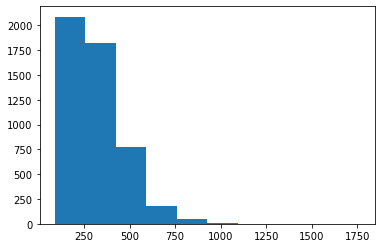

In [12]:
plt.hist(dfx['order_amount']);

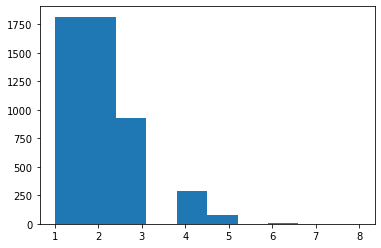

In [13]:
plt.hist(dfx['total_items']);

In [14]:
dfx.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


- **What metric would you report for this dataset?**
    
    By cleaning the dataset, we can still use the mean or median.
    
    I would report the mean.
    
- **What is its value?**
302.6 / 284 respectively

**Question 2: For this question you’ll need to use SQL. Follow this link to access the data set
required for the challenge. Please use queries to answer the following questions. Paste your
queries along with your final numerical answers below.**

**How many orders were shipped by Speedy Express in total?**

SELECT COUNT(DISTINCT(OrderID))

FROM Orders

WHERE ShipperID = 1

**R= 54**

**What is the last name of the employee with the most orders?**

SELECT DISTINCT(EmployeeID), COUNT(EmployeeID)

FROM Orders

GROUP BY EmployeeID

**R = ID: 4, Last Name: Peacock**

**What product was ordered the most by customers in Germany?**

SELECT p.ProductName, SUM(Quantity) AS TotalQuantity

FROM Orders AS o, OrderDetails AS od, Customers AS c, Products AS p

WHERE c.Country = "Germany" AND od.OrderID = o.OrderIDAND od.ProductID = p.ProductIDAND c.CustomerID = o.CustomerID

GROUP BY p.ProductID

ORDER BY TotalQuantityDESC

**R = Boston Crab Meat**